## Project 8: Monto carlo simulation

#### 19 August 2022

In [2]:
import pandas as pd

In [3]:
df_Mon=pd.read_csv(r'/home/seun/Desktop/spicedacademy/Week8/classwork/monday.csv', sep=";") 
df_Tue=pd.read_csv(r'/home/seun/Desktop/spicedacademy/Week8/classwork/tuesday.csv', sep=";") 
df_Wed=pd.read_csv(r'/home/seun/Desktop/spicedacademy/Week8/classwork/wednesday.csv', sep=";") 
df_Thu=pd.read_csv(r'/home/seun/Desktop/spicedacademy/Week8/classwork/thursday.csv', sep=";") 
df_Fri=pd.read_csv(r'/home/seun/Desktop/spicedacademy/Week8/classwork/friday.csv', sep=";") 

df_Mon.head(3)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy


In [4]:
df_Mon['customer_no'] = df_Mon['customer_no'] + 100000
df_Tue['customer_no'] = df_Tue['customer_no'] + 20000
df_Wed['customer_no'] = df_Wed['customer_no'] + 300000
df_Thu['customer_no'] = df_Thu['customer_no'] + 40000
df_Fri['customer_no'] = df_Fri['customer_no'] + 500000

In [5]:
def location_count(dayz):
    da=dayz.groupby("location")["customer_no"].count()
    da=pd.DataFrame(da)
    da.reset_index(inplace=True)
    return da

In [6]:
index_mon = pd.Index(['Mon', 'Mon', 'Mon', 'Mon','Mon'])
index_tue = pd.Index(['Tue', 'Tue', 'Tue', 'Tue','Tue'])
index_wed = pd.Index(['Wed', 'Wed', 'Wed', 'Wed','Wed'])
index_thu = pd.Index(['Thu', 'Thu', 'Thu', 'Thu','Thu'])
index_fri = pd.Index(['Fri', 'Fri', 'Fri', 'Fri','Fri'])

mon_loc=location_count(df_Mon).set_index(index_mon)
tue_loc=location_count(df_Tue).set_index(index_tue)
wed_loc=location_count(df_Wed).set_index(index_wed)
thu_loc=location_count(df_Thu).set_index(index_thu)
fri_loc=location_count(df_Fri).set_index(index_fri)

Text(0, 0.5, 'Count')

<Figure size 5400x360 with 0 Axes>

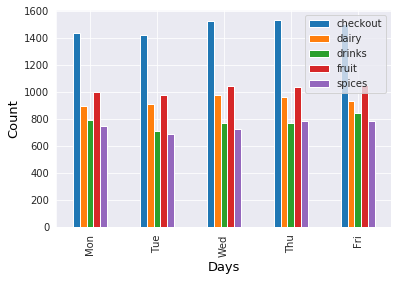

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import seaborn


frames = [mon_loc, tue_loc, wed_loc, thu_loc,fri_loc]
f3 = pd.concat(frames)

f3=f3.pivot(columns='location',values='customer_no')

df = pd.DataFrame(f3,columns=['checkout','dairy','drinks','fruit','spices'], index = ['Mon','Tue','Wed','Thu','Fri'])

sns.set_style("dark")
plt.figure(figsize=(75,5))
g=df.plot(kind="bar")
plt.grid(True)

plt.xlabel('Days',fontsize=13,color='k')
plt.ylabel('Count',fontsize=13,color='k')




In [8]:
d1 = df_Mon.merge(df_Tue, how='outer')
d2 = d1.merge(df_Wed, how='outer')
d3 = d2.merge(df_Thu, how='outer')
Week_Data= d3.merge(df_Fri, how='outer')
Week_Data.head(3)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,100001,dairy
1,2019-09-02 07:03:00,100002,dairy
2,2019-09-02 07:04:00,100003,dairy


In [9]:
Week_Data['timestamp'] = pd.to_datetime(Week_Data['timestamp'] )

In [10]:
data_grp = Week_Data.groupby("location")["customer_no"].count()
sections = pd.DataFrame(data_grp)
sections.reset_index(inplace=True)
sections

,location,customer_no
0,checkout,7417
1,dairy,4679
2,drinks,3905
3,fruit,5122
4,spices,3754


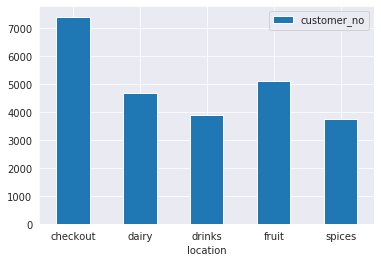

In [11]:
import matplotlib.pyplot as plt
ax = sections.plot.bar(x='location', y='customer_no', rot=0)
plt.grid(True)

In [12]:
def expand_time(dataz):
    pd.set_option('display.max_rows', None)
    dataz['timestamp'] = pd.to_datetime(dataz['timestamp'])
    dataz['hour'] = dataz['timestamp'].dt.hour
    dataz['day'] = dataz['timestamp'].dt.day
    dataz['date'] = dataz['timestamp'].dt.date  
    dataz.set_index(dataz['date'], inplace=True)
    #dataz=dataz.drop(columns=['timestamp'])
    return dataz

In [13]:
Week_Data=expand_time(Week_Data)

#Week_Data.reset_index(drop=True, inplace=True)
Week_Data.head()

,timestamp,customer_no,location,hour,day,date
date,,,,,,
2019-09-02,2019-09-02 07:03:00,100001,dairy,7,2,2019-09-02
2019-09-02,2019-09-02 07:03:00,100002,dairy,7,2,2019-09-02
2019-09-02,2019-09-02 07:04:00,100003,dairy,7,2,2019-09-02
2019-09-02,2019-09-02 07:04:00,100004,dairy,7,2,2019-09-02
2019-09-02,2019-09-02 07:04:00,100005,spices,7,2,2019-09-02


In [14]:
#data_dairy = Week_Data.loc[Week_Data['location'] == 'dairy']
#data_drinks =Week_Data.loc[Week_Data['location'] == 'drinks']
#data_fruit = Week_Data.loc[Week_Data['location'] == 'fruit']
#data_spices = Week_Data.loc[Week_Data['location'] == 'spices']
#data_checkout = Week_Data.loc[Week_Data['location'] == 'checkout']


### Number of customers in each section over 5 days 

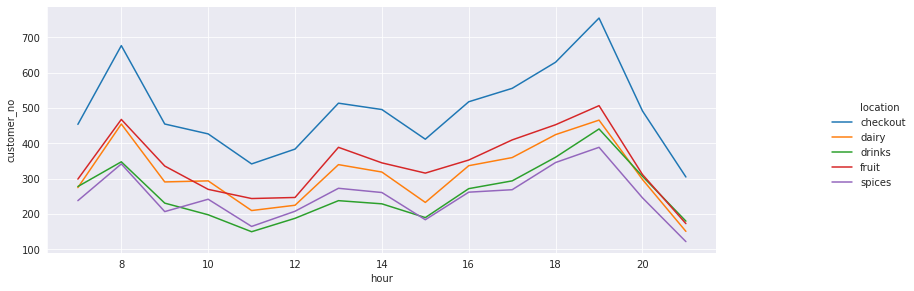

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import seaborn

total_customers = pd.DataFrame(Week_Data.groupby(['hour','location'])['customer_no'].count())
total_customers.reset_index(inplace=True)
g=sns.relplot(x='hour', y='customer_no', hue='location', kind='line', data=total_customers)
g.fig.set_figwidth(14)
g.fig.set_figheight(4)
plt.grid(True)

In [16]:
Week_Data.reset_index(drop=True, inplace=True)

Week_Data.sort_values(by=['customer_no','timestamp'],inplace=True)


In [17]:
Week_Data=Week_Data.drop(columns=['hour','day','date'])
Week_Data.head(4)

,timestamp,customer_no,location
4884,2019-09-03 07:02:00,20001,fruit
4887,2019-09-03 07:05:00,20001,drinks
4909,2019-09-03 07:12:00,20001,checkout
4885,2019-09-03 07:02:00,20002,drinks


In [18]:
customers_unique = Week_Data['customer_no'].unique()
customers_unique = list(customers_unique)

In [19]:
for i in customers_unique:  
    customer_data = Week_Data.loc[Week_Data['customer_no'] == i] 
    if customer_data.loc[customer_data['location'] == 'checkout'].empty:
        time = str(list(customer_data['timestamp'])[0])   
        dict = {'timestamp':time[0:11] + '22:00:00' , 'customer_no': i, 'location': 'checkout'}
        Week_Data = Week_Data.append(dict, ignore_index = True)

#### Reset the date and resort by customer_no and timestamp again

In [20]:
Week_Data['timestamp'] = pd.to_datetime(Week_Data['timestamp'])
Week_Data.sort_values(by=['customer_no', 'timestamp'], inplace= True)

In [21]:
Week_Data.head(4)

,timestamp,customer_no,location
0,2019-09-03 07:02:00,20001,fruit
1,2019-09-03 07:05:00,20001,drinks
2,2019-09-03 07:12:00,20001,checkout
3,2019-09-03 07:02:00,20002,drinks


### Choose unique customers

In [22]:
customers_unique = Week_Data['customer_no'].unique()
customers_unique = list(customers_unique)

### Force every cutomer to checkout

In [23]:
for i in customers_unique:
    
    customer_data = Week_Data.loc[Week_Data['customer_no'] == i]
    #if len(customer_data['location']) ==1:
        #print('-----------')
        #print(customer_data)
    if customer_data.loc[customer_data['location'] == 'checkout'].empty:
       time = str(list(customer_data['timestamp'])[0])
       
       dict = {'timestamp':time[0:11] + '22:00:00' , 'customer_no': i, 'location': 'checkout'}
       Week_Data = Week_Data.append(dict, ignore_index = True)


### Reset the date and resort by customer_no and timestamp again

In [24]:
Week_Data['timestamp'] = pd.to_datetime(Week_Data['timestamp'])
Week_Data.sort_values(by=['customer_no', 'timestamp'], inplace= True)
Week_Data.head(4)

,timestamp,customer_no,location
0,2019-09-03 07:02:00,20001,fruit
1,2019-09-03 07:05:00,20001,drinks
2,2019-09-03 07:12:00,20001,checkout
3,2019-09-03 07:02:00,20002,drinks


In [25]:
#import pandas as pd

#l = (pd.DataFrame(columns=['NULL'],
  #                index=pd.date_range('2019-09-03 07:01:00', '2019-09-06 22:00:00',
     #                                 freq='60S'))
  #     .between_time('07:00','22:00')
   #    .index.strftime('%Y-%m-%d %H:%M:%S')
  #     .tolist()
#)


### Get the location vector and next_location vector seperately

In [38]:
df1 = ['drinks', 'fruit', 'spices', 'dairy', 'checkout', 'entrance'] 
df2 = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]

data_group = pd.DataFrame(df2, index=[df1], columns=df1)
data_group   

,drinks,fruit,spices,dairy,checkout,entrance
drinks,0,0,0,0,0,0
fruit,0,0,0,0,0,0
spices,0,0,0,0,0,0
dairy,0,0,0,0,0,0
checkout,0,0,0,0,1,0
entrance,0,0,0,0,0,0


In [42]:
# Into the location and next_location vectors, entrance and chekout will be added

location = []
next_location = []


for i in customers_unique:
    
        
   
    customer_data = Week_Data.loc[Week_Data['customer_no'] == i]
    
        
    first_time =  list(customer_data['timestamp'])[0]
    end_time = list(customer_data['timestamp'])[-1]
    
    datelist = pd.date_range(start=first_time, end=end_time, freq='60S')
    datelist = pd.DataFrame(datelist)

      
    datelist['timestamp'] = datelist[0]
    datelist.drop(columns=0, inplace=True)
   

    d1 = datelist.merge(customer_data, how='outer')
    d1.ffill(inplace=True)
    d1 = d1.astype({"customer_no": int}, errors='raise') 
    
    d1['next_location'] = d1['location'].shift(-1)
    
  
    
    d1_s = []
    d1_s = list(d1['location'])
    d1_s.insert(0,'entrance')
    d1_f = pd.DataFrame(d1_s, columns=['location'])
    d1_f['next_location'] = d1_f['location'].shift(-1)
    d1_f.fillna('checkout', inplace=True)
    #print(d1_f)    
    
    location.extend(list(d1_f['location']))
    next_location.extend(list(d1_f['next_location']))
    

### Concatenate location and next_location

In [45]:
data_shift = pd.DataFrame(list(zip(location, next_location)), columns=['location', 'next_location'])
data_shift.head(4)

,location,next_location
0,entrance,fruit
1,fruit,fruit
2,fruit,fruit
3,fruit,drinks


In [46]:
entrance = [0.0,0.0,0.0,0.0,0.0,0.0]
entrance = pd.DataFrame(entrance,columns=['entrance'])

In [47]:
trans=pd.crosstab(data_shift ['location'], data_shift ['next_location'], normalize=0)
trans['entrance'] = entrance['entrance']
entrance['entrance'].values 
trans['entrance'] = entrance['entrance'].values
trans

next_location,checkout,dairy,drinks,fruit,spices,entrance
location,,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
dairy,0.102617,0.738910,0.058088,0.049439,0.050946,0.0
drinks,0.215290,0.010877,0.599282,0.087737,0.086814,0.0
entrance,0.000000,0.287576,0.153526,0.377435,0.181464,0.0
fruit,0.200454,0.095376,0.054534,0.599249,0.050387,0.0
spices,0.149494,0.191688,0.161820,0.090234,0.406764,0.0


### Convert the transition matrix into list

In [48]:
transition_matrix=[]

temp_matrix = list(trans.to_numpy())

for i in temp_matrix:
    transition_matrix.append(list(i))


In [49]:
transition_matrix

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.10261704145973997,
  0.7389096590592042,
  0.05808827632386586,
  0.04943920540148429,
  0.0509458177557056,
  0.0],
 [0.21528989225243714,
  0.010877373011800924,
  0.599281682914315,
  0.08773730118009236,
  0.08681375064135453,
  0.0],
 [0.0,
  0.2875755540631296,
  0.15352585627938214,
  0.3774345198119543,
  0.18146406984553393,
  0.0],
 [0.20045379860730772,
  0.09537594867381269,
  0.05453407401611767,
  0.5992488850637665,
  0.050387293638995384,
  0.0],
 [0.14949431099873578,
  0.19168773704171935,
  0.16182048040455121,
  0.0902338811630847,
  0.40676359039190896,
  0.0]]

### Create a function that gives state vectors

In [50]:
def statevector(section):
    if section=='checkout':
       vec = [1,0,0,0,0,0]
    if section=='dairy':
       vec = [0,1,0,0,0,0]
    if section=='drinks':
       vec = [0,0,1,0,0,0] 
    if section=='fruit':
       vec = [0,0,0,1,0,0]   
    if section=='spices':
       vec = [0,0,0,0,1,0]
    if section=='entrance':
       vec = [0,0,0,0,0,1]         
    return vec

### Create a function that gives the location based to the probabilitiy distribustion

In [51]:
import math as mt
import random

def state_name(vec):
    
    p1 = ['checkout']*(mt.ceil(vec[0]))*100
    p2 = ['dairy']*(mt.ceil(vec[1]))*100
    p3 = ['drinks']*(mt.ceil(vec[2]))*100
    p4 = ['fruit']*(mt.ceil(vec[3]))*100
    p5 = ['spices']*(mt.ceil(vec[4]))*100
    p6 = ['enrtance']*(mt.ceil(vec[5]))*100
    
    vec_c = p1 + p2 + p3 + p4 + p5 + p6
    
    random.shuffle(vec_c)
    
    next_state = random.choice(vec_c)
       
        
    return next_state
    

### Get names from data

In [52]:
name_data = pd.read_csv('namelist.csv')
name_w = list(name_data['name'])

# choose the first 500 names

name = name_w[0:499]

In [53]:
name

['John',
 'William',
 'James',
 'Charles',
 'George',
 'Frank',
 'Joseph',
 'Thomas',
 'Henry',
 'Robert',
 'Edward',
 'Harry',
 'Walter',
 'Arthur',
 'Fred',
 'Albert',
 'Samuel',
 'David',
 'Louis',
 'Joe',
 'Charlie',
 'Clarence',
 'Richard',
 'Andrew',
 'Daniel',
 'Ernest',
 'Will',
 'Jesse',
 'Oscar',
 'Lewis',
 'Peter',
 'Benjamin',
 'Frederick',
 'Willie',
 'Alfred',
 'Sam',
 'Roy',
 'Herbert',
 'Jacob',
 'Tom',
 'Elmer',
 'Carl',
 'Lee',
 'Howard',
 'Martin',
 'Michael',
 'Bert',
 'Herman',
 'Jim',
 'Francis',
 'Harvey',
 'Earl',
 'Eugene',
 'Ralph',
 'Ed',
 'Claude',
 'Edwin',
 'Ben',
 'Charley',
 'Paul',
 'Edgar',
 'Isaac',
 'Otto',
 'Luther',
 'Lawrence',
 'Ira',
 'Patrick',
 'Guy',
 'Oliver',
 'Theodore',
 'Hugh',
 'Clyde',
 'Alexander',
 'August',
 'Floyd',
 'Homer',
 'Jack',
 'Leonard',
 'Horace',
 'Marion',
 'Philip',
 'Allen',
 'Archie',
 'Stephen',
 'Chester',
 'Willis',
 'Raymond',
 'Rufus',
 'Warren',
 'Jessie',
 'Milton',
 'Alex',
 'Leo',
 'Julius',
 'Ray',
 'Sidney

### Create time series with frequency 1 minute

In [54]:
from datetime import datetime


t1 = datetime.strptime('09/10/19 07:00:00', '%m/%d/%y %H:%M:%S')
t2 = datetime.strptime('09/10/19 22:00:00', '%m/%d/%y %H:%M:%S')


time_series= pd.DataFrame(pd.date_range(start=t1, end=t2, freq='60S'))

### This function retrives the time using the index of 'time_series'

In [55]:
def choose_time(l):
    time = time_series[0][l]
    #print(time)
    return time

In [56]:
choose_time(400)

Timestamp('2019-09-10 13:40:00')

In [57]:
import numpy as np


class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """   
    
    def __init__(self, name, path=[7], entry_time=0, visit_times=[0], budget=100):
        self.name = name
        self.budget = budget
        
        
        
        # Make the whole path of the customer
        
        position = 'entrance'
        
        path_v = ['entrance']
        
        while position != 'checkout':
              vec = statevector(position)
              
              next_state_vec = np.dot(vec, transition_matrix)
              next_position = state_name(next_state_vec) 
              path_v.append(next_position) 
              position = next_position
        self.path = path_v
        
        # assign a randam entry_time
        l = len(time_series)   
        
        l_p = len(self.path) # this is not to exceed close time
        
            # choose a random int in (0,l)
        l_1 = random.randint(0, l-l_p-1)
        self.entry_time = choose_time(l_1)
        
        
        ll = len(self.path)
        self.visit_times = pd.date_range(start=self.entry_time, periods=ll, freq='60S')
        

### Create names 500 customers

In [58]:
my_objects = {}
for k in name:
   name1 = format(k)
       
   my_objects[name1] = my_objects.get(name1, Customer(name = name1))

In [59]:
my_objects['John'].path

['entrance', 'fruit', 'dairy', 'drinks', 'checkout']

In [60]:
my_objects['John'].visit_times

DatetimeIndex(['2019-09-10 09:07:00', '2019-09-10 09:08:00',
               '2019-09-10 09:09:00', '2019-09-10 09:10:00',
               '2019-09-10 09:11:00'],
              dtype='datetime64[ns]', freq='60S')

In [61]:
John = Customer('John')
John.path

['entrance', 'dairy', 'checkout']

In [62]:
cust1 = Customer('Niki')
cust1.path


['entrance', 'spices', 'drinks', 'checkout']

In [63]:
cust1.entry_time    

Timestamp('2019-09-10 09:38:00')

In [64]:
cust1.visit_times

DatetimeIndex(['2019-09-10 09:38:00', '2019-09-10 09:39:00',
               '2019-09-10 09:40:00', '2019-09-10 09:41:00'],
              dtype='datetime64[ns]', freq='60S')

In [65]:

cus_name = []
for x in name:
   namel = format(x)
   cus_name.append(namel)   


In [66]:
NAMES=pd.DataFrame(cus_name,columns=['CusNames'])


In [67]:
location = []
for x in name:
   cust1 = Customer('x')
   c=cust1.path
   location.append(c)   

In [68]:
L=location


In [70]:
LO=pd.DataFrame({'Market_Section':location})
LO.T

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
Market_Section,"[entrance, checkout]","[entrance, dairy, drinks, checkout]","[entrance, spices, drinks, checkout]","[entrance, checkout]","[entrance, spices, spices, checkout]","[entrance, checkout]","[entrance, spices, fruit, fruit, drinks, check...","[entrance, dairy, spices, spices, spices, drin...","[entrance, fruit, spices, drinks, spices, dair...","[entrance, fruit, dairy, fruit, spices, drinks...",...,"[entrance, spices, dairy, fruit, spices, dairy...","[entrance, drinks, dairy, dairy, dairy, checkout]","[entrance, fruit, spices, drinks, checkout]","[entrance, drinks, spices, dairy, checkout]","[entrance, dairy, fruit, spices, spices, spice...","[entrance, dairy, dairy, fruit, spices, spices...","[entrance, spices, drinks, fruit, fruit, spice...","[entrance, drinks, spices, fruit, fruit, dairy...","[entrance, drinks, checkout]","[entrance, checkout]"


In [71]:
LO.T.columns 

RangeIndex(start=0, stop=499, step=1)

In [76]:
LO.Market_Section[3]

['entrance', 'checkout']

In [77]:
f=pd.DataFrame(location)


In [78]:
VisitTimes = []
for x in name:
   cust1 = Customer('x')
   v=cust1.visit_times
   VisitTimes.append(v)   

In [79]:
v=pd.DataFrame(VisitTimes)


In [80]:
df_w = pd.DataFrame(columns=['timestamp', 'customer_name', 'location'])

t1_w = []
p1_w = []
n1_w = []
for i in name:
    df = pd.DataFrame()
    name1 = format(i)
    t1 = pd.DataFrame(my_objects[name1].visit_times)
    p1 = pd.DataFrame(my_objects[name1].path)
    
    l = len(t1[0])
    t1_w.append(t1)
    p1_w.append(p1)
    
    n1 = pd.DataFrame([name1]*l)
    n1_w.append(n1)

In [81]:
f1=pd.DataFrame(t1_w)

/home/seun/anaconda3/lib/python3.7/site-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
#f3=f3.pivot(index='date',columns='location',values='customer_no')

In [ ]:
#f3=df_Mon.pivot(index='timestamp',columns='location',values='customer_no')